In [13]:
import matplotlib.pylab as plt

In [1]:
txt_test = """R 6 (#70c710)
D 5 (#0dc571)
L 2 (#5713f0)
D 2 (#d2c081)
R 2 (#59c680)
D 2 (#411b91)
L 5 (#8ceee2)
U 2 (#caa173)
L 1 (#1b58a2)
U 2 (#caa171)
R 2 (#7807d2)
U 3 (#a77fa3)
L 2 (#015232)
U 2 (#7a21e3)"""

In [2]:
with open("input/18", "r") as fp:
    txt = fp.read()[:-1]

In [3]:
def process_puzzle(ttt):
    lines = ttt.split('\n')
    lst = []
    for line in lines:
        a, b, _ = line.split()
        lst.append((a, int(b)))
        
    return lst

In [186]:
def move_instruction(lst):
    pos = (0, 0)
    locs = [(0, 0)]
    for m, v in lst:
        if m == "D":
            for _ in range(v):
                pos = (pos[0]+1, pos[1])
                locs.append(pos)
        elif m == "U":
            for _ in range(v):
                pos = (pos[0]-1, pos[1])
                locs.append(pos)
        elif m == "L":
            for _ in range(v):
                pos = (pos[0], pos[1]-1)
                locs.append(pos)
        elif m == "R":
            for _ in range(v):
                pos = (pos[0], pos[1]+1)
                locs.append(pos)
                
    return locs

In [187]:
def fill_in(M, x0, y0):
    lst = [(x0, y0)]
    while len(lst) != 0:
        x, y = lst.pop()
        
        if M[x, y] == 1:
            continue
        
        M[x, y] = 1
        lst.append((x, y+1))
        lst.append((x, y-1))        
        lst.append((x-1, y))        
        lst.append((x+1, y))                
    
    return M

# Part 1

In [213]:
my_puzzle = txt_test
my_puzzle = txt
commands = process_puzzle(my_puzzle)

locs = move_instruction(commands)

In [214]:
X = np.array(locs)
# Find the zeros
X = X - X.min(axis=0)

M = np.zeros(X.max(axis=0)+1)
M[X[:, 0], X[:, 1]] = 1


In [196]:
#M = fill_in(M, 200, 100)
M = fill_in(M, 1, 2)

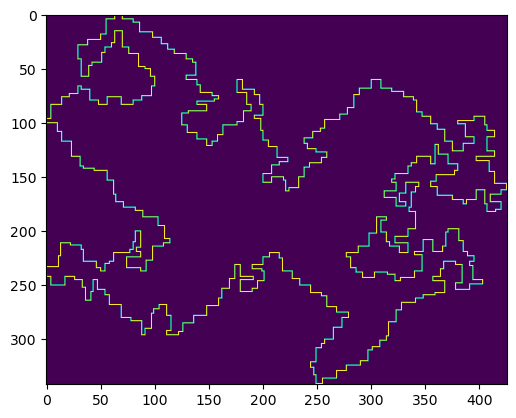

In [215]:
plt.imshow(M)

In [24]:
print('Part 1: {}'.format(M.sum()))

Part 1: 61865.0


# Part 2

In [34]:
def process_puzzle_P2(ttt):
    lines = ttt.split('\n')
    dic= {"0": "R", "1": "D", "2": "L", "3": "U"}
    
    lst = []
    for line in lines:
        a, b, c = line.split()
        c1 = int(c[2:-2], 16)
        
        lst.append((dic[c[-2]], c1))
        
    return lst

In [40]:
def move_instruction_P2(lst):
    pos = (0, 0)
    locs = [(0, 0)]
    for m, v in lst:
        if m == "D":
            pos = (pos[0]-v, pos[1])
            locs.append(pos)
        elif m == "U":
            pos = (pos[0]+v, pos[1])
            locs.append(pos)
        elif m == "L":
            pos = (pos[0], pos[1]-v)
            locs.append(pos)
        elif m == "R":
            pos = (pos[0], pos[1]+v)
            locs.append(pos)
                
    return locs

In [253]:
my_puzzle = txt_test
my_puzzle = txt

In [254]:
patterns = ["RDL", "DLU", "LUR", "URD"]
patterns_neg = ["RUL", "DRU", "LDR", "ULD"]

patterns_simple = ["RL", "UD", "DU", "LR"]
patterns_follows = ["RR", "DD", "LL", "UU"]

commands = process_puzzle_P2(my_puzzle)

codes = "".join(list(map(lambda x: x[0], commands)))
tot = 0

#for _ in range(100):
while True:
    print(tot)
    
    for a in 'RLDU':
        P = list(filter(lambda x: x[0] == a, commands))
        print("\t", a, sum(map(lambda x: x[1], P)))

    #print(commands)
    
    FLAG = False
    p = None
    for p in patterns_follows + patterns_simple + patterns  + patterns_neg :
        if p in codes:
            FLAG = True
            break
    
    if FLAG == False:
        if len(codes) <= 1:
            break
            
        else:
            # Rotate
            codes = codes[1:] + codes[0]
            commands = commands[1:] + [commands[0]]
            continue
            
    print("\t", p)
    
    if len(p) == 3:
        i = codes.find(p)
        a0, x0 = commands[i]
        a1, x1 = commands[i+1]
        a2, x2 = commands[i+2]

        if p in patterns_neg:
            print("\tNEG")
            if x0 < x2:
                tot -= (x0) * (x1-1)
                commands[i+2] = (a2, x2-x0)
                commands.pop(i)
                codes = codes[:i] + codes[i+1:]

            elif x0 > x2:
                tot -= (x2) * (x1-1)
                commands[i] = (a0, x0 - x2)
                commands.pop(i+2)
                codes = codes[:i+2] + codes[i+3:]

            elif x0 == x2:
                tot -= (x2) * (x1-1)
                commands.pop(i+2)
                commands.pop(i)
                codes = codes[:i] + codes[i+1] + codes[i+3:]
        
            
        else:

            if x0 < x2:
                tot += x0 * (x1+1)
                commands[i+2] = (a2, x2-x0)
                commands.pop(i)
                codes = codes[:i] + codes[i+1:]

            elif x0 > x2:
                tot += x2 * (x1+1)
                commands[i] = (a0, x0 - x2)
                commands.pop(i+2)
                codes = codes[:i+2] + codes[i+3:]

            elif x0 == x2:
                tot += x2 * (x1+1)
                commands.pop(i+2)
                commands.pop(i)
                codes = codes[:i] + codes[i+1] + codes[i+3:]
        
    elif len(p) == 2:
        
        if p in patterns_simple:
            # Opposite directions
            i = codes.find(p)
            a0, x0 = commands[i]
            a1, x1 = commands[i+1]

            if x0 < x1:
                commands[i+1] = (a1, x1-x0)
                commands.pop(i)
                codes = codes[:i] + codes[i+1:]
                tot += x0

            elif x0 > x1:
                commands[i] = (a0, x0-x1)
                commands.pop(i+1)
                codes = codes[:i+1] + codes[i+2:]
                tot += x1

            elif x0 == x1:
                commands.pop(i)
                commands.pop(i)
                codes = codes[:i] + codes[i+2:]
                tot += x0
        
        else:
            # Two successive letters
            # Compress
            i = codes.find(p)
            a0, x0 = commands[i]
            a1, x1 = commands[i+1]
            commands[i] = (a0, x1+x0)
            commands.pop(i+1)
            codes = codes[:i+1] + codes[i+2:]


0
	 R 30034982
	 L 30034982
	 D 28024973
	 U 28024973
	 RDL
757011800
	 R 30032796
	 L 30032796
	 D 28024973
	 U 28024973
	 DU
757225297
	 R 30032796
	 L 30032796
	 D 27811476
	 U 27811476
	 RDL
44979030661
	 R 29699808
	 L 29699808
	 D 27811476
	 U 27811476
	 DD
44979030661
	 R 29699808
	 L 29699808
	 D 27811476
	 U 27811476
	 RDL
108131223373
	 R 29302894
	 L 29302894
	 D 27811476
	 U 27811476
	 DD
108131223373
	 R 29302894
	 L 29302894
	 D 27811476
	 U 27811476
	 RDL
128416630663
	 R 29259976
	 L 29259976
	 D 27811476
	 U 27811476
	 DD
128416630663
	 R 29259976
	 L 29259976
	 D 27811476
	 U 27811476
	 RDL
133851620764
	 R 29252635
	 L 29252635
	 D 27811476
	 U 27811476
	 DD
133851620764
	 R 29252635
	 L 29252635
	 D 27811476
	 U 27811476
	 RDL
180030279850
	 R 29028142
	 L 29028142
	 D 27811476
	 U 27811476
	 DD
180030279850
	 R 29028142
	 L 29028142
	 D 27811476
	 U 27811476
	 RDL
237377080402
	 R 28785628
	 L 28785628
	 D 27811476
	 U 27811476
	 DD
237377080402
	 R 28785628
	 L 28

In [256]:
print("Part 2: {}".format(tot+1))

Part 2: 40343619199142


In [ ]:
13512895914150 # Too low

40343634141774 # Too High
40343619199142 # Good one